In [1]:
# traditional_ml.py
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv("/content/IMDB Dataset.csv")

# Optional: check what columns are in your DataFrame
print(df.columns)

# Use either 'label' or 'sentiment' as target
# Assuming: 'review' is the text and 'sentiment' is the label
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df["review"], df["sentiment"], test_size=0.2, random_state=42
)


Index(['review', 'sentiment'], dtype='object')


In [3]:
from datasets import Dataset

# Convert train and test sets to Hugging Face format
train_dataset = Dataset.from_pandas(pd.DataFrame({"text": train_texts, "label": train_labels}))
test_dataset = Dataset.from_pandas(pd.DataFrame({"text": test_texts, "label": test_labels}))

# Combine into a dictionary
hf_dataset = {"train": train_dataset, "test": test_dataset}

# Now you can access:
train_texts = hf_dataset['train']['text']
train_labels = hf_dataset['train']['label']
test_texts = hf_dataset['test']['text']
test_labels = hf_dataset['test']['label']

In [4]:
# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(test_texts)

In [5]:
# Train Logistic Regression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, train_labels)

LogisticRegression(max_iter=1000)

In [6]:
# Evaluate
preds = clf.predict(X_test)
print("Traditional ML Results:\n", classification_report(test_labels, preds))

Traditional ML Results:
               precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.89      0.90     10000
weighted avg       0.90      0.90      0.90     10000



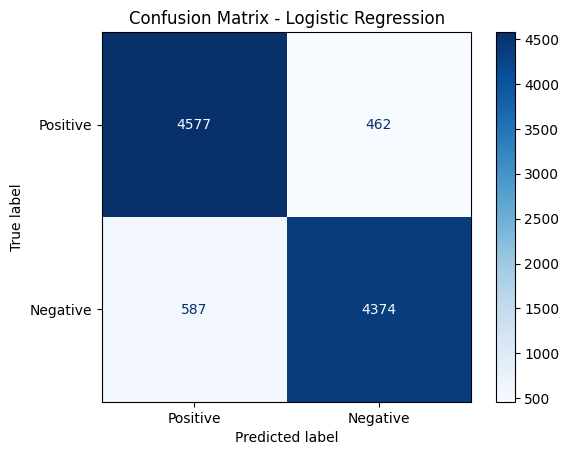

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Confusion matrix
cm = confusion_matrix(test_labels, preds, labels=["positive", "negative"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Negative"])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [11]:

# Classification report as dict
report = classification_report(test_labels, preds, target_names=["negative", "positive"], output_dict=True)

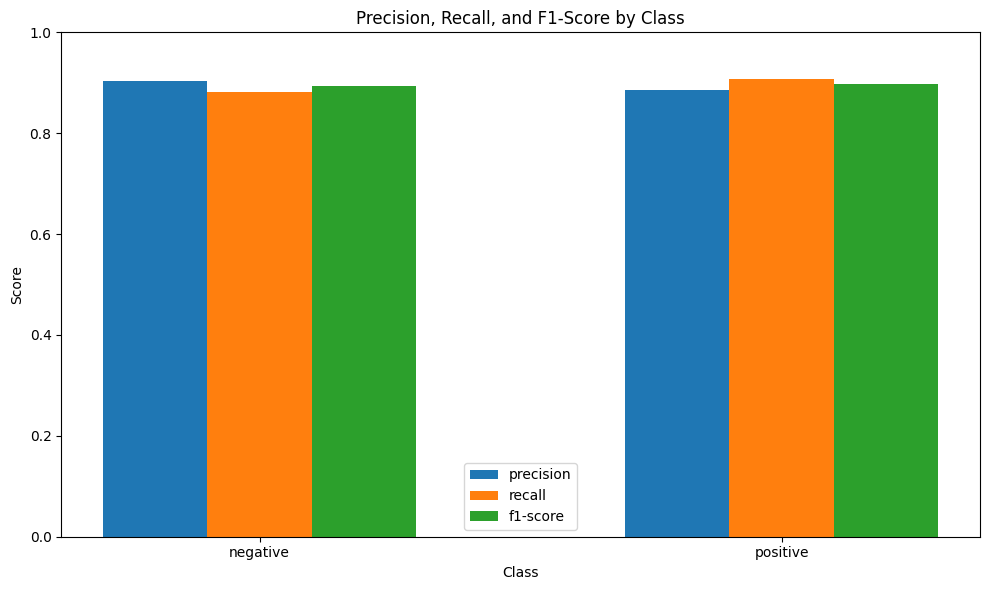

In [12]:
# Bar Plot for Precision, Recall, F1-score
labels = ["negative", "positive"]
metrics = ["precision", "recall", "f1-score"]
values = {metric: [report[label][metric] for label in labels] for metric in metrics}

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    plt.bar(x + i*width, values[metric], width, label=metric)

plt.ylabel('Score')
plt.xlabel('Class')
plt.title('Precision, Recall, and F1-Score by Class')
plt.xticks(x + width, labels)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()